In [2]:
setwd('/import/DB/fel/BJTC-204')
library(Seurat)

In [3]:
sce = readRDS('male.sc.rds')

In [6]:
sce$celltype = factor(sce$celltype,levels = c('Ast','ExN','InN','OPC','Oli','End','Mic'))

In [7]:
unique(sce$celltype)

[1] Ast ExN InN OPC Oli End Mic
Levels: Ast ExN InN OPC Oli End Mic

In [17]:
sce$group = sce$Condition

In [18]:
table(sce$group)


   Case Control 
   3105    3148 

In [19]:
Idents(sce) = 'celltype'

In [20]:
sce = subset(sce,downsample = 1000)

In [21]:
library(Seurat)
# plotting and data science packages
library(tidyverse)
library(cowplot)
library(patchwork)
# co-expression network analysis packages:
library(WGCNA)
library(hdWGCNA)
# using the cowplot theme for ggplot
theme_set(theme_cowplot())
# set andom seed for reproducibility
set.seed(12345)

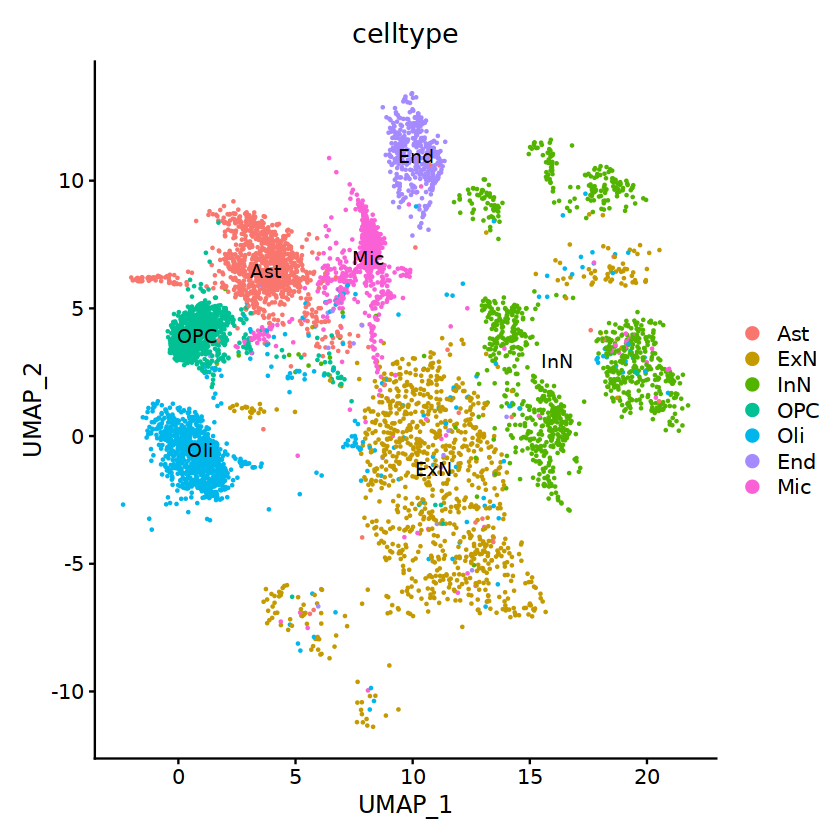

In [22]:
DimPlot(sce, group.by='celltype', label=TRUE) 

In [23]:
seurat_obj <- SetupForWGCNA(
  sce,
  gene_select = "fraction", # the gene selection approach
  fraction = 0.05, # fraction of cells that a gene needs to be expressed in order to be included
  wgcna_name = "tutorial" # the name of the hdWGCNA experiment
)

In [24]:
# construct metacells  in each group
seurat_obj <- MetacellsByGroups(
  seurat_obj = seurat_obj,
  group.by = c("celltype", "group"), # specify the columns in seurat_obj@meta.data to group by
  k = 25, # nearest-neighbors parameter
  max_shared = 10, # maximum number of shared cells between two metacells
  ident.group = 'celltype' # set the Idents of the metacell seurat object
)

# normalize metacell expression matrix:
seurat_obj <- NormalizeMetacells(seurat_obj)

ERROR: Error in MetacellsByGroups(seurat_obj = seurat_obj, group.by = c("celltype", : Invalid reduction (pca). Reductions in Seurat object: umap


In [7]:
table(sce$group)


     OS control 
   2502     407 

In [8]:
metacell_obj <- GetMetacellObject(seurat_obj)

In [9]:
seurat_obj <- NormalizeMetacells(seurat_obj)
seurat_obj <- ScaleMetacells(seurat_obj, features=VariableFeatures(seurat_obj))
seurat_obj <- RunPCAMetacells(seurat_obj, features=VariableFeatures(seurat_obj))
seurat_obj <- RunHarmonyMetacells(seurat_obj, group.by.vars='group')
seurat_obj <- RunUMAPMetacells(seurat_obj, reduction='harmony', dims=1:20)

Centering and scaling data matrix

PC_ 1 
Positive:  MICOS10, NME2, EEF1G, CTHRC1, PLCG2, GAS5, SNHG29, PSMB5, BASP1, DIPK2A 
	   PLOD2, ATP5MC3, LMAN1, QPCT, RRBP1, ATP5MC2, KDELR3, PTN, KCNQ1OT1, CCN1 
	   CALU, GPC1, CNN3, PSAT1, ZFAS1, MTRNR2L8, PI15, VMP1, TGFBI, EDIL3 
Negative:  CTGF, MUM1, AES, SEPT7, CYR61, KLK4, ESM1, GFRA1, C6orf48, SEPT2 
	   MINOS1, SEPT11, C8orf59, RARRES3, PLA2G16, KDELC2, ITGA8, EBF3, FZD8, FAM96B 
	   SEPT10, C1orf123, SEPT1, C2orf40, LGI4, SEPT9, LTBP2, TROVE2, NGFR, C19orf70 
PC_ 2 
Positive:  AOC2, RHBDL2, MEF2C, PCDH9, KERA, ANO5, OLFM3, CA3, PAGE5, DIO2 
	   ITGA4, LIMCH1, CDKN2A, SLIRP, MAFB, TMSB15A, ID1, SCIN, BCO2, NDNF 
	   IFITM5, NFKBIA, CCNL1, STMN1, ARL4A, WIF1, OMD, CDH15, PGF, TUBB4B 
Negative:  THY1, FAP, IGFBP4, CAV1, MXRA7, COL6A2, THBS2, FSTL1, S100A10, CTSB 
	   COL5A1, COL6A1, COL4A2, AEBP1, CERCAM, POSTN, COL11A1, CAV2, COL4A1, PLOD1 
	   TIMP1, CD44, TSPO, LOXL2, ANXA1, COL15A1, GUK1, COL3A1, ACTA2, PPP1R14B 
PC_ 3 
Positive:  E

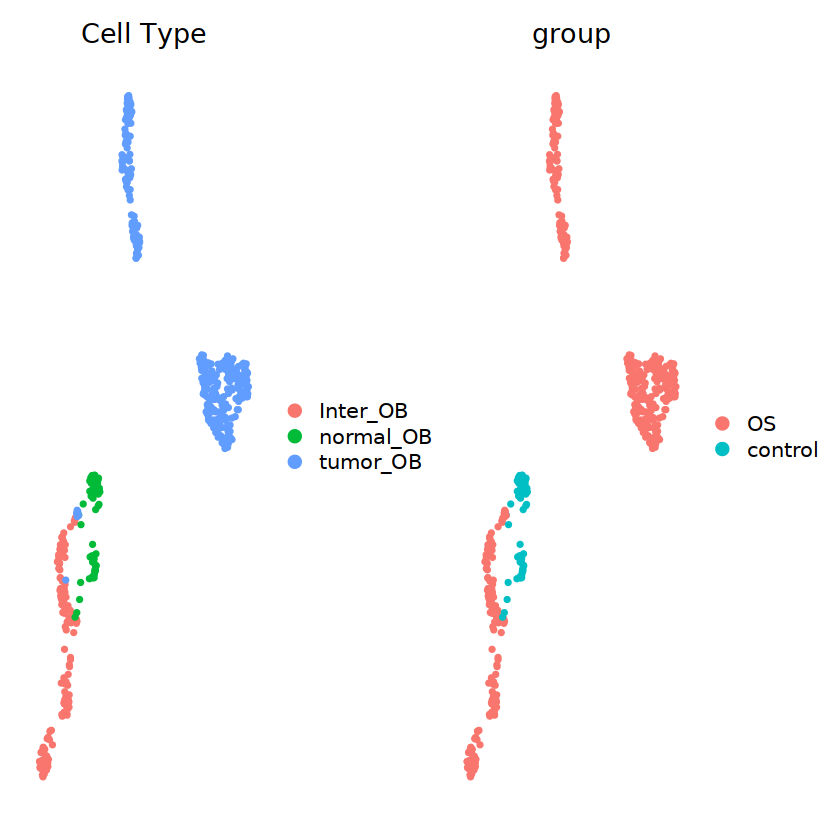

In [10]:
p1 <- DimPlotMetacells(seurat_obj, group.by='cellgroup') + umap_theme() + ggtitle("Cell Type")
p2 <- DimPlotMetacells(seurat_obj, group.by='group') + umap_theme() + ggtitle("group")

p1 | p2

In [11]:
seurat_obj <- SetDatExpr(
  seurat_obj,
  group_name = unique(sce$cellgroup),
  group.by='cellgroup'
)

Warning message in SetDatExpr(seurat_obj, group_name = unique(sce$cellgroup), group.by = "cellgroup"):
"assay not specified, trying to use assay RNA"


pickSoftThreshold: will use block size 4100.
 pickSoftThreshold: calculating connectivity for given powers...
   ..working on genes 1 through 4100 of 10911


Warning message:
"executing %dopar% sequentially: no parallel backend registered"
Warning message in (function (x, y = NULL, robustX = TRUE, robustY = TRUE, use = "all.obs", :
"bicor: zero MAD in variable 'x'. Pearson correlation was used for individual columns with zero (or missing) MAD."
Warning message in (function (x, y = NULL, robustX = TRUE, robustY = TRUE, use = "all.obs", :
"bicor: zero MAD in variable 'y'. Pearson correlation was used for individual columns with zero (or missing) MAD."


   ..working on genes 4101 through 8200 of 10911


Warning message in (function (x, y = NULL, robustX = TRUE, robustY = TRUE, use = "all.obs", :
"bicor: zero MAD in variable 'x'. Pearson correlation was used for individual columns with zero (or missing) MAD."
Warning message in (function (x, y = NULL, robustX = TRUE, robustY = TRUE, use = "all.obs", :
"bicor: zero MAD in variable 'y'. Pearson correlation was used for individual columns with zero (or missing) MAD."


   ..working on genes 8201 through 10911 of 10911


Warning message in (function (x, y = NULL, robustX = TRUE, robustY = TRUE, use = "all.obs", :
"bicor: zero MAD in variable 'x'. Pearson correlation was used for individual columns with zero (or missing) MAD."
Warning message in (function (x, y = NULL, robustX = TRUE, robustY = TRUE, use = "all.obs", :
"bicor: zero MAD in variable 'y'. Pearson correlation was used for individual columns with zero (or missing) MAD."


   Power SFT.R.sq slope truncated.R.sq  mean.k. median.k. max.k.
1      1   0.6280 12.90          0.937 5620.000  5.67e+03 6140.0
2      2   0.0196 -1.05          0.940 3040.000  3.03e+03 3820.0
3      3   0.2680 -2.92          0.911 1710.000  1.67e+03 2540.0
4      4   0.4880 -3.01          0.916  994.000  9.43e+02 1770.0
5      5   0.6270 -2.72          0.928  598.000  5.55e+02 1270.0
6      6   0.7600 -2.55          0.959  371.000  3.35e+02  944.0
7      7   0.8290 -2.57          0.975  236.000  2.05e+02  732.0
8      8   0.8580 -2.55          0.976  154.000  1.28e+02  584.0
9      9   0.8550 -2.55          0.969  103.000  8.18e+01  474.0
10    10   0.8400 -2.56          0.958   70.500  5.29e+01  391.0
11    12   0.8630 -2.45          0.974   35.100  2.29e+01  275.0
12    14   0.8770 -2.34          0.982   18.800  1.03e+01  202.0
13    16   0.8740 -2.24          0.971   10.700  4.84e+00  152.0
14    18   0.8710 -2.15          0.967    6.500  2.34e+00  117.0
15    20   0.8560 -2.03  

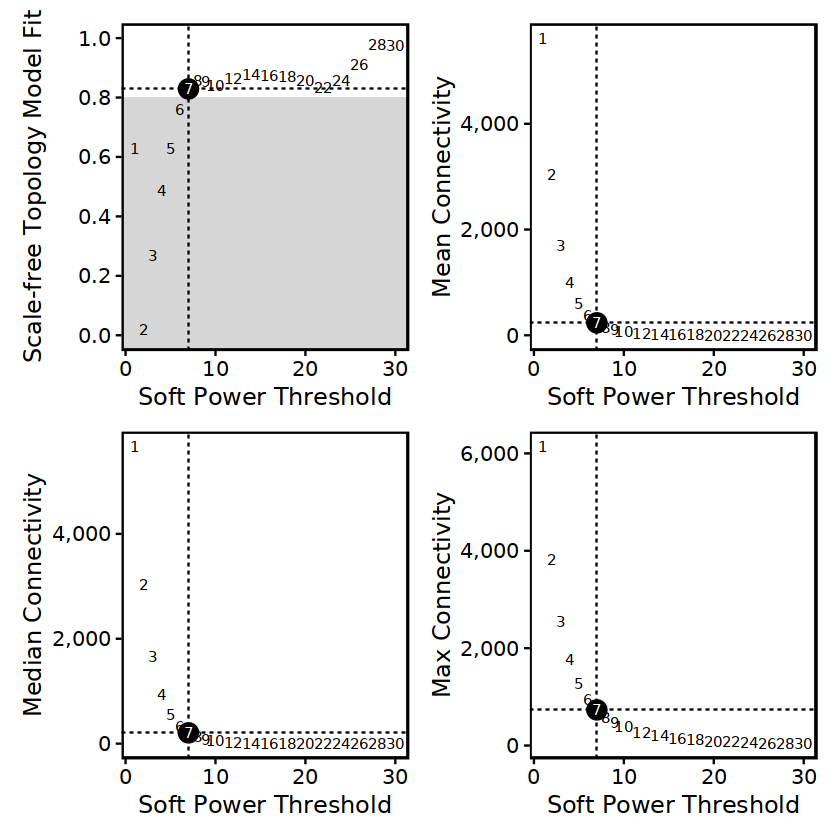

In [12]:
# Test different soft powers:
seurat_obj <- TestSoftPowers(
  seurat_obj,
  networkType = 'signed' # you can also use "unsigned" or "signed hybrid"
)

# plot the results:
plot_list <- PlotSoftPowers(seurat_obj)

# assemble with patchwork
wrap_plots(plot_list, ncol=2)

In [13]:
power_table <- GetPowerTable(seurat_obj)
head(power_table)

,Power,SFT.R.sq,slope,truncated.R.sq,mean.k.,median.k.,max.k.
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,0.62819081,12.894078,0.9367240,5620.5613,5666.5893,6141.9298
2,2,0.01963415,-1.048066,0.9398083,3035.3184,3030.6076,3819.9059
3,3,0.26752156,-2.921528,0.9114767,1706.4911,1665.1419,2538.9971
4,4,0.48838937,-3.009794,0.9160865,994.1141,943.2874,1767.7229
5,5,0.62680706,-2.718561,0.9283066,598.0182,555.0813,1274.5021
6,6,0.75954430,-2.549263,0.9586130,370.5014,334.6773,944.4253


In [14]:
a=power_table$SFT.R.sq
i = 1
for (b in a){
    print(b)
    if (b<0.8) {
        i=i+1
        print(i)
    }else if(b>0.8){
        break
        }
}
select_soft_power = power_table$Power[i]

[1] 0.6281908
[1] 2
[1] 0.01963415
[1] 3
[1] 0.2675216
[1] 4
[1] 0.4883894
[1] 5
[1] 0.6268071
[1] 6
[1] 0.7595443
[1] 7
[1] 0.829073


In [15]:
select_soft_power

[1] 7

In [16]:
# construct co-expression network:
seurat_obj <- ConstructNetwork(
  seurat_obj, soft_power=select_soft_power,
  setDatExpr=FALSE,
  tom_name = 'OB' # name of the topoligical overlap matrix written to disk
)                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       

 Calculating consensus modules and module eigengenes block-wise from all genes
 Calculating topological overlaps block-wise from all genes
   Flagging genes and samples with too many missing values...
    ..step 1
    TOM calculation: adjacency..
    ..will not use multithreading.
     Fraction of slow calculations: 0.000000
    ..connectivity..
    ..matrix multiplication (system BLAS)..
    ..normalization..
    ..done.
 ..Working on block 1 .
 ..Working on block 1 .
 ..merging consensus modules that are too close..


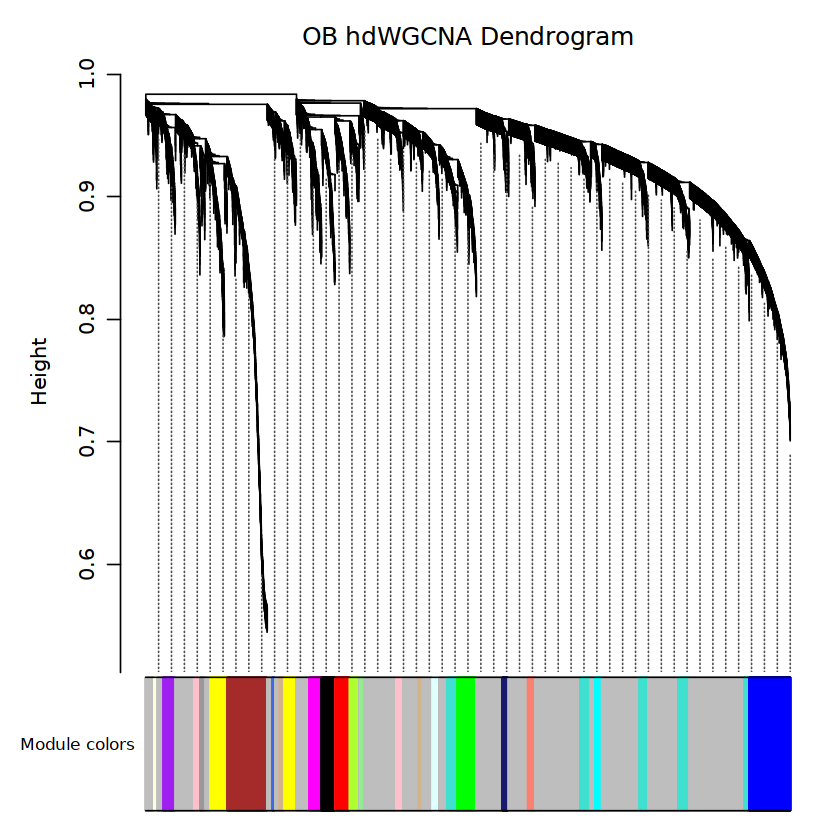

In [17]:
PlotDendrogram(seurat_obj, main='OB hdWGCNA Dendrogram')